## Example of use of the TS-Evolutionary_Prototyping class for searching the prototype of a set of data series. 

In this example, the centroid of one class of the '50 words' dataset is calculated by the TS-Evolutionary_Prototyping algorithm. This algorithm uses a genetic algorithm to search the serie that minimizes the DTW distance respect all series in a set.

The dataset '50 words'  consists of word profiles for George Washington's manuscripts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from TS_Evolutionary_Prototyping.ga import TS_prototyping

#### Define the parameters of the Genetic Algorithm

In [2]:
data_path = './data/50words_TRAIN'
ag_params = {
    'pop_size': 100,
    'ngen': 30,
    'cxpb': 0.1,
    'mutpb': 0.05,
    'batch_evaluate': False,
    'batch_size': 0.5,
    'verbose': True,
    'multi_jobs': True 
}

#### Load dataset

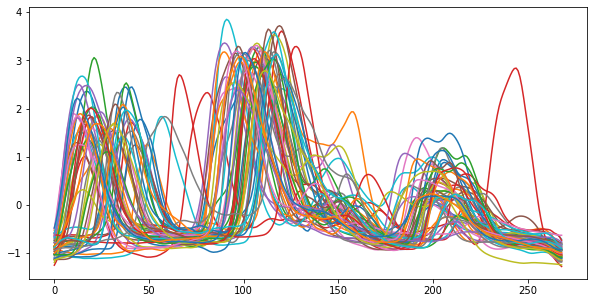

In [3]:
series = pd.read_csv(data_path, header=None)

# select series of class 1. The class number can be changed; there are 50 classes.
series = series.loc[series[0] == 1].values  

series = series[:, 1:]  # skip class value

plt.figure(figsize=(10, 5))
for s in series:
    plt.plot(s[1:])
plt.show()

#### Looking for the Prototype

In [4]:
ga = TS_prototyping(**ag_params)
centroid, best_fitness, log = ga.calculate_centroids(series)          

gen	nevals	avg    	std    	min    	max   
0  	100   	92432.8	47661.7	50049.3	324240
1  	11    	56389.6	6606.64	49571.5	74114.8
2  	17    	50053.2	734.035	44001.5	53489.1
3  	17    	49313.6	1685.14	44001.5	50248.4
4  	15    	46274.4	2687.66	43751.8	50747.3
5  	9     	44061.1	424.772	43583.8	46071.4
6  	14    	43998.2	657.688	42793.5	47633.7
7  	20    	43700.8	538.894	42330.6	46362.7
8  	7     	43092  	610.979	41924.5	46332.3
9  	16    	42533  	701.718	41633.2	45691.1
10 	22    	42120.4	577.576	41633.2	45565.3
11 	17    	41791.1	404.477	39262.6	43688.4
12 	14    	41555.5	819.232	39067.8	43622.7
13 	22    	40308  	1158.53	39067.8	42680.1
14 	11    	39302.3	622.722	39013  	43278.9
15 	14    	39374.1	847.727	38803.1	42396.9
16 	11    	39108.2	551.938	37822.6	42471.3
17 	16    	38924.3	674.928	37822.6	41364.7
18 	12    	38398.6	760.596	37822.6	42200  
19 	18    	38192.5	1012.56	37376.9	42968.5
20 	13    	38115.7	965.822	37376.9	42264.3
21 	13    	37920.3	986.894	37376.9	40765.8
22 	10    	37

#### Plotting the results

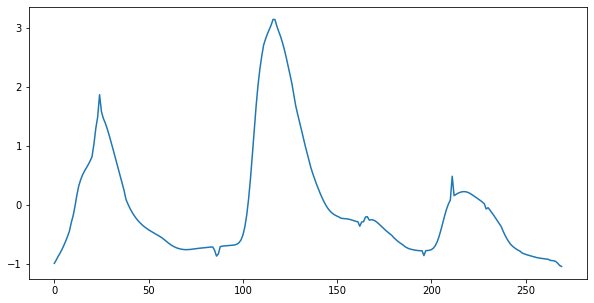

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(centroid)
plt.show()